## Bank Marketing Analysis

#### Description of columns in the dataset
1. age: Age of customer
2. job: Job of customer
3. marital status: Marital status of customer
4. education: Education level
5. default: Having a previously broken credit
6. housing: Home loan?
7. loan: Personal loan?
8. contact: Was the customer contacted on his home or mobile phone?
9. month: Last month of contact
10. day: The day of contacted
11. duration: Talk time on last call
12. campaign: The number of contacts reaching the customer during        the current campaign (including the last contact)
13. pdays: The number of days since the previous campaign, if         reached (-1 if it was never reached before)
14. previous: The number of contacts that reached the customer       before this campaign
15. poutcome: Previous campaign success or failure
16. balance: Balance
17. deposit: whether deposit or not

### Import Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.style.use('fivethirtyeight')
color=['#00e5ee','#008080','gray','indigo','pink','orange','#cd5555','green','blue']

### Load dataset

In [2]:
data = pd.read_csv('bank.csv')

In [3]:
# view the dataset
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# view last 5 rows
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [5]:
data.shape

(11162, 17)

In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
#check missing values
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [9]:
# Descriptive statistics
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## Univariate Variable Analysis
1. Categorial variables
2. Numerical variables

In [10]:
category = []
numerical = []
for c in data:
    if data[c].dtypes in ['object']:
        category.append(c)
    else:
        numerical.append(c)

In [11]:
# categorical variables
category

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [12]:
# numerical variables
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

## Categorical Variable

In [13]:
# bar_plot function
def bar_plot(variable):
    var = data[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,4))
    plt.bar(varValue.index, varValue,color=color)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel('Frequency')
    plt.title(variable,fontsize=13)
    plt.tight_layout()
    plt.show()
    
    print("{}: \n {}".format(variable,varValue))

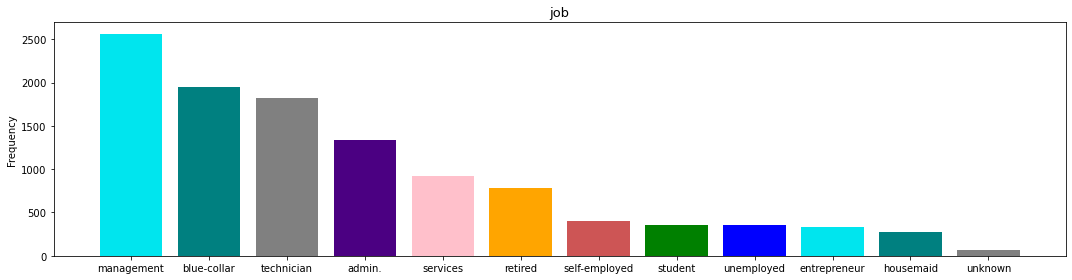

job: 
 management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


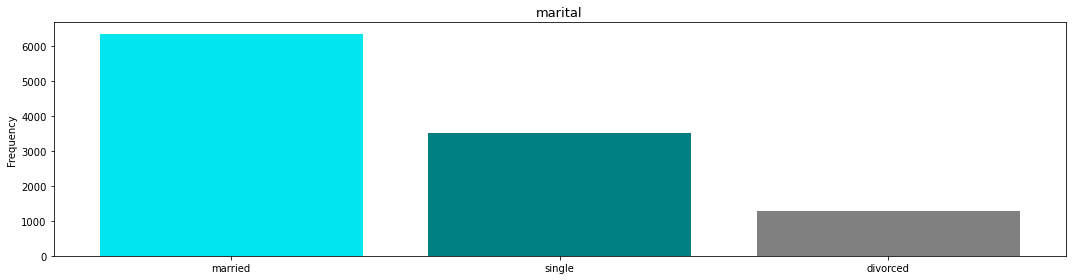

marital: 
 married     6351
single      3518
divorced    1293
Name: marital, dtype: int64


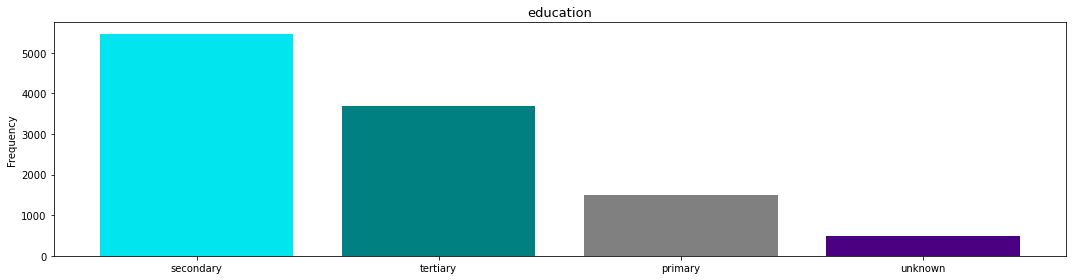

education: 
 secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


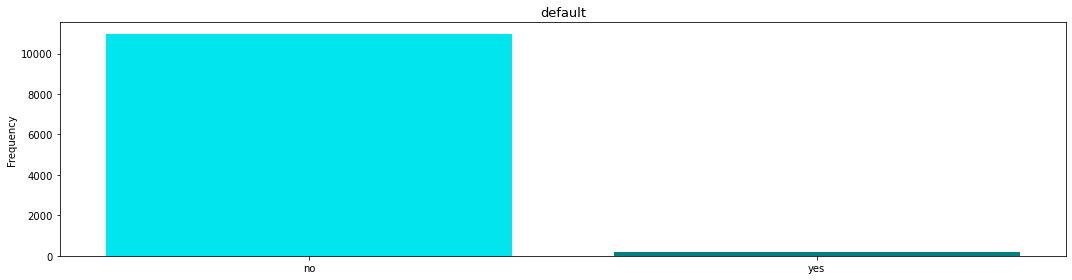

default: 
 no     10994
yes      168
Name: default, dtype: int64


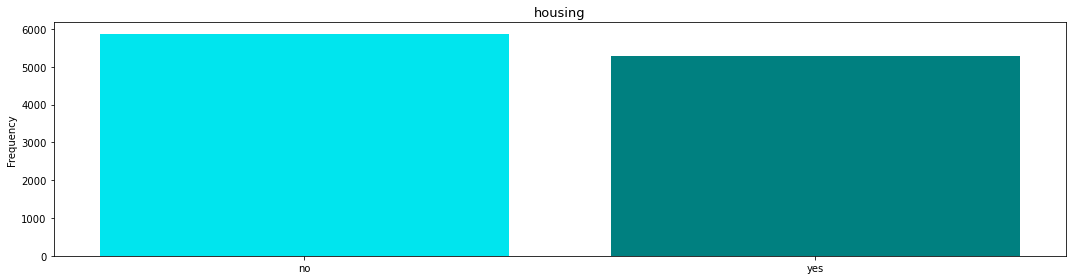

housing: 
 no     5881
yes    5281
Name: housing, dtype: int64


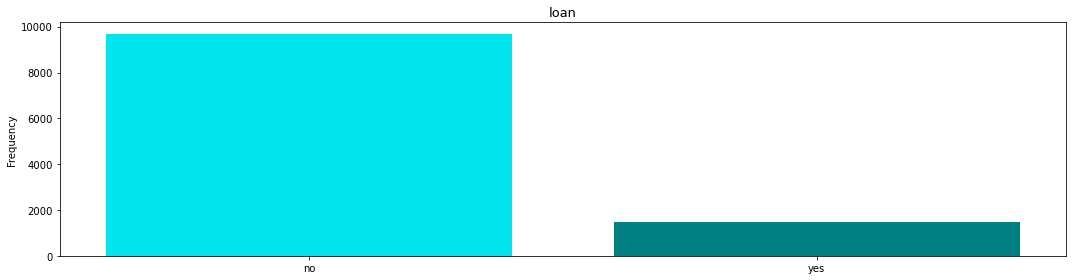

loan: 
 no     9702
yes    1460
Name: loan, dtype: int64


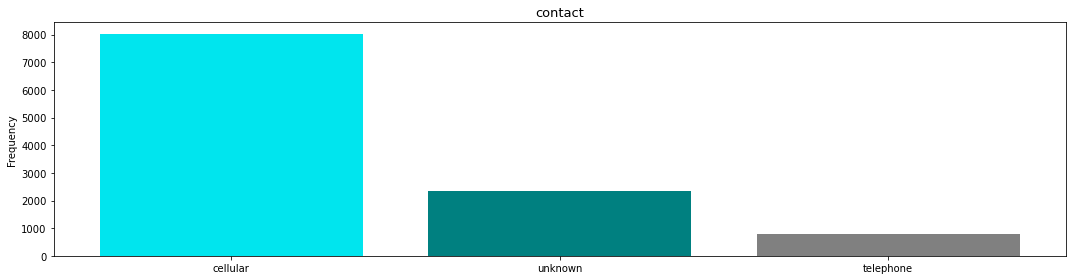

contact: 
 cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64


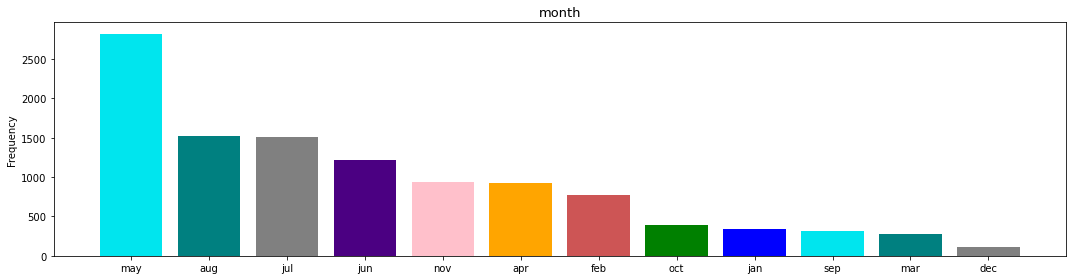

month: 
 may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64


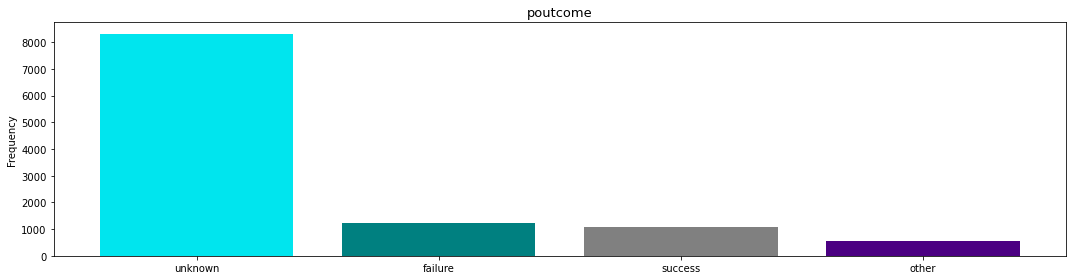

poutcome: 
 unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64


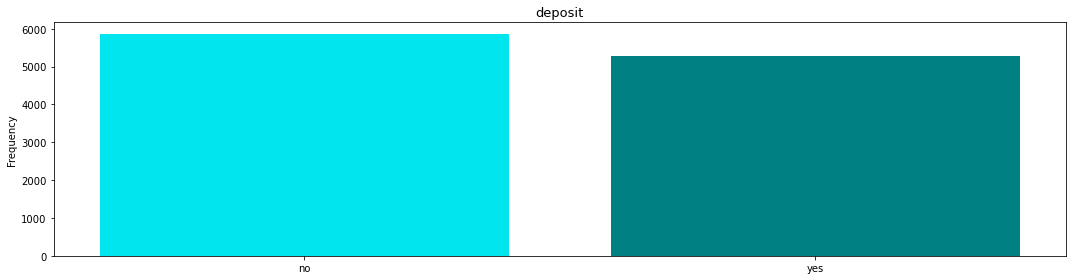

deposit: 
 no     5873
yes    5289
Name: deposit, dtype: int64


In [14]:
# lets visualize the categorical values
for c in category:
    bar_plot(c)

## Numberical Variables

In [15]:
# hist plot function
def hist_plot(variable):
    plt.figure(figsize=(9,6))
    plt.hist(data[variable], bins=40,color='#cd1096')
    plt.xlabel(variable,size=10)
    plt.ylabel('Frequency', size=10)
    plt.title("{} distribution with histogram".format(variable))
    plt.tight_layout()
    plt.show()
    data[variable].plot.box(vert=False,patch_artist=True)
    plt.xlabel(variable)
    plt.tight_layout()
    plt.show()

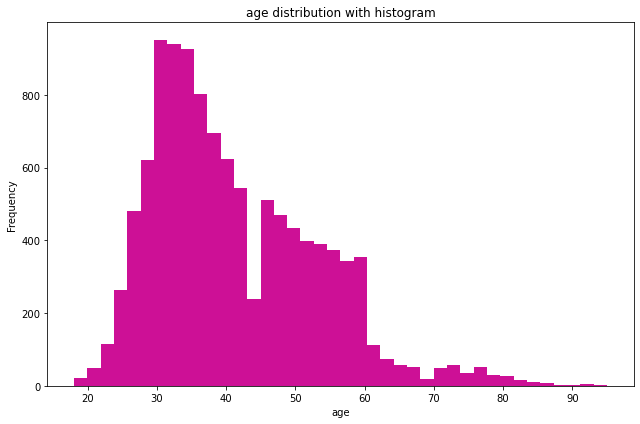

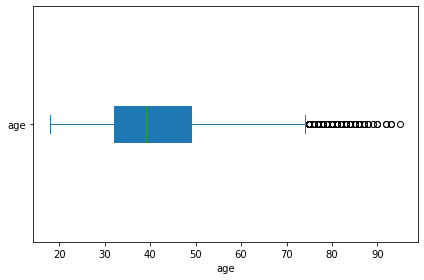

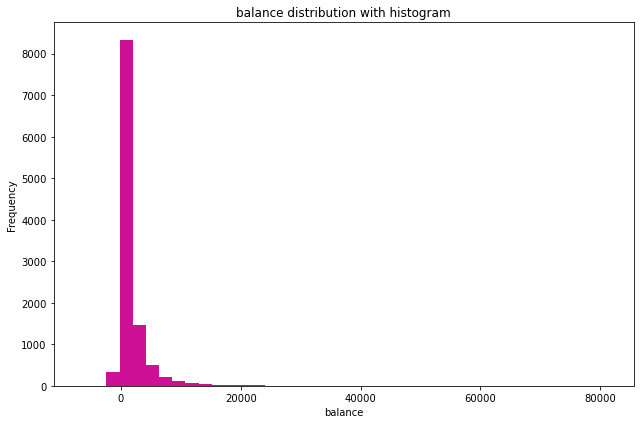

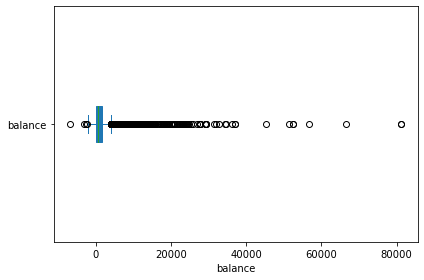

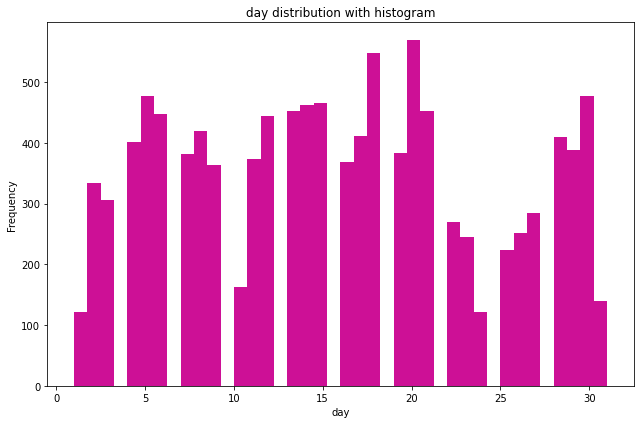

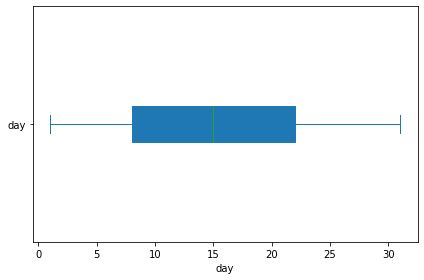

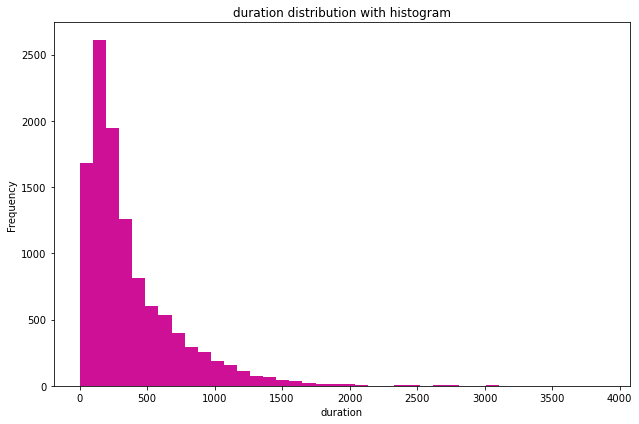

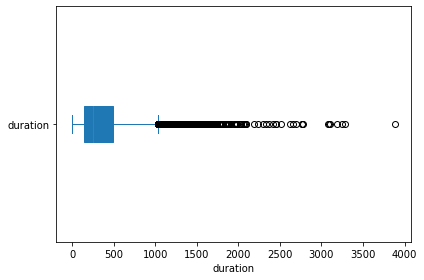

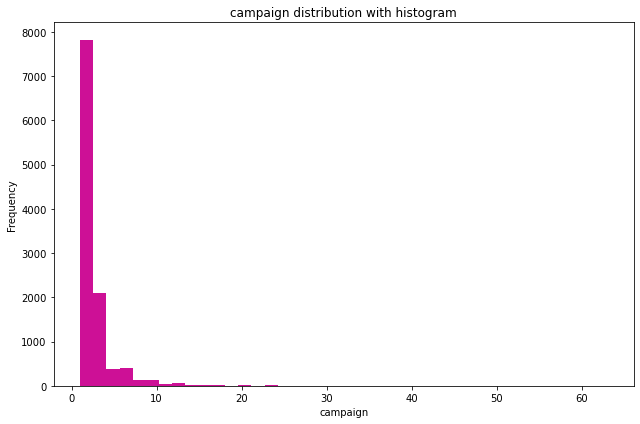

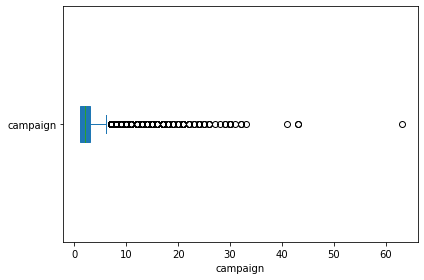

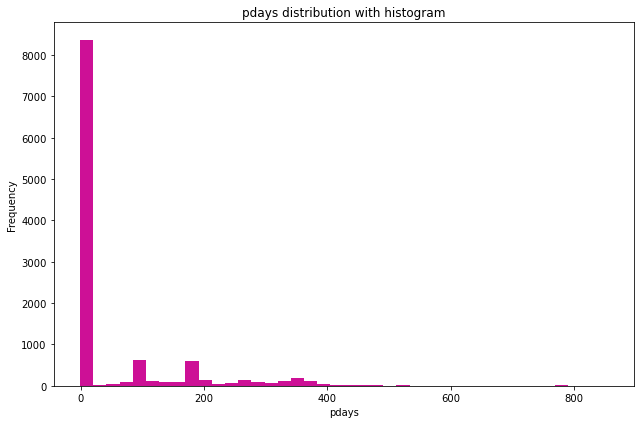

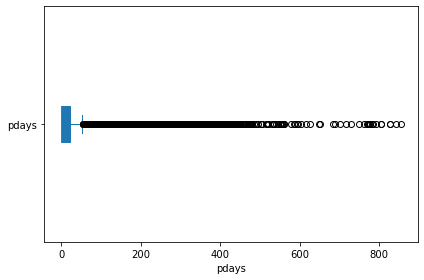

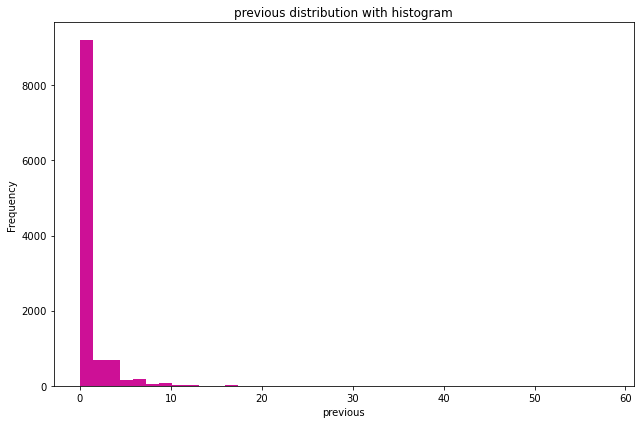

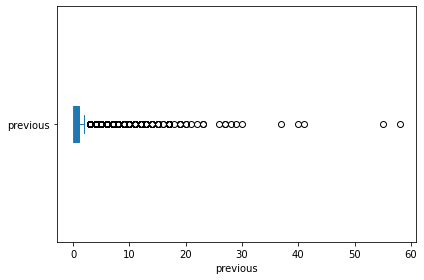

In [16]:
for n in numerical:
    hist_plot(n)

The numerical variables contain a lot of outliers.

### Age distribution

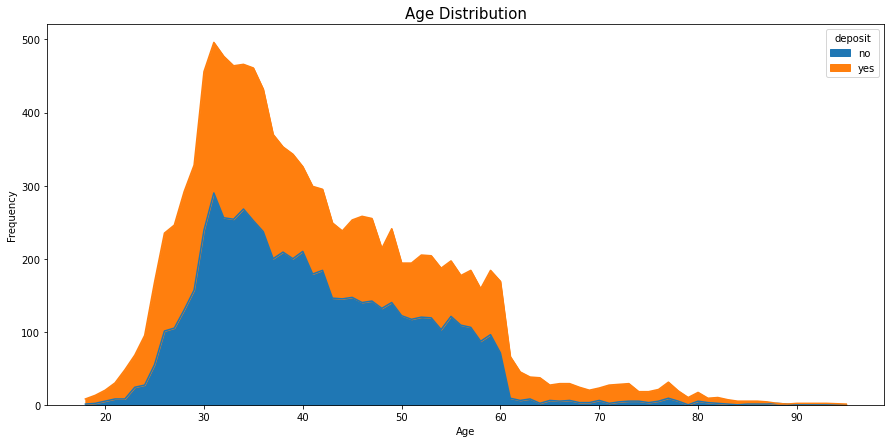

In [17]:
pd.crosstab(data.age,data.deposit).plot(kind='area', figsize=(15,7))
plt.title('Age Distribution', size=15)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The number of people who are 25 to 40 years old with a time deposit account is high

### Duration distribution


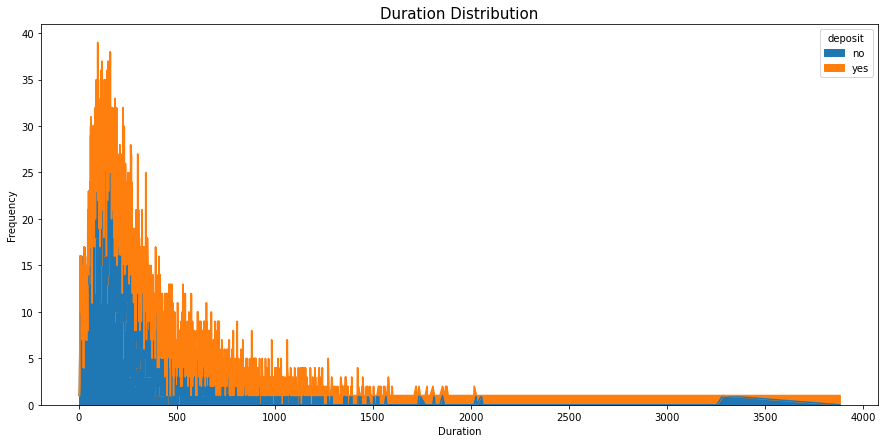

In [18]:
pd.crosstab(data.duration,data.deposit).plot(kind='area', figsize=(15,7))
plt.title('Duration Distribution', size=15)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

### Job distribution

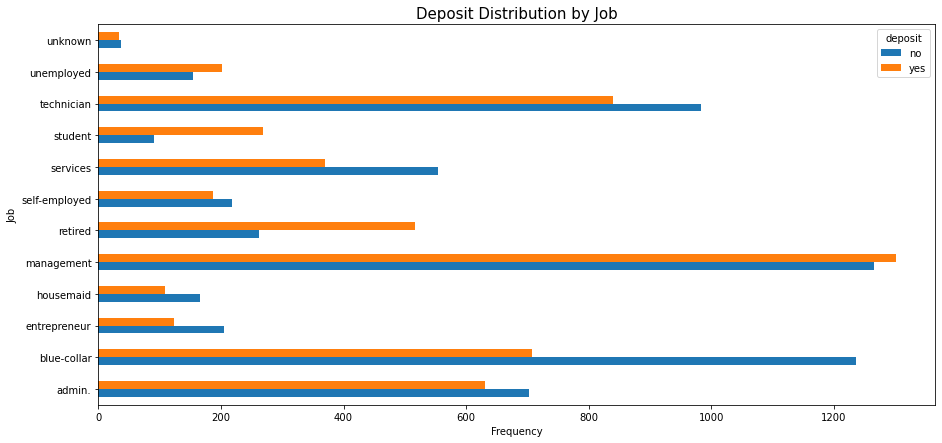

In [19]:
pd.crosstab(data.job,data.deposit).plot(kind='barh', figsize=(15,7))
plt.title('Deposit Distribution by Job', size=15)
plt.ylabel('Job')
plt.xlabel('Frequency')
plt.show()

### Education Level distribution

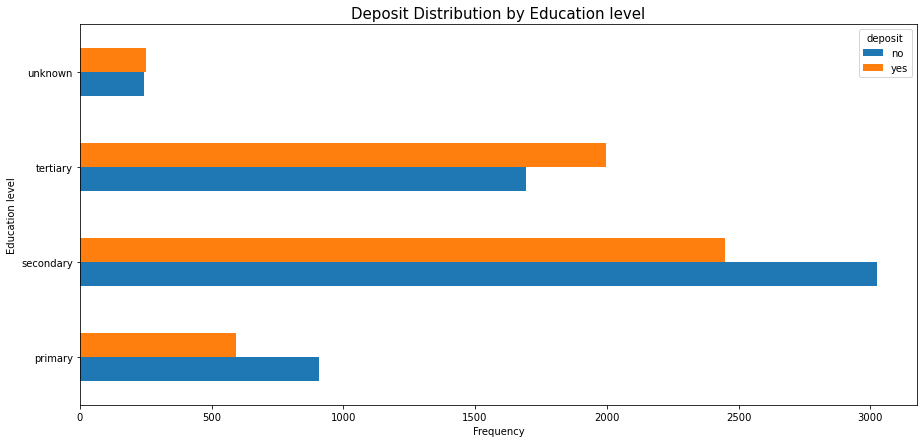

In [20]:
pd.crosstab(data.education,data.deposit).plot(kind='barh', figsize=(15,7))
plt.title('Deposit Distribution by Education level', size=15)
plt.ylabel('Education level')
plt.xlabel('Frequency')
plt.show()

A lot of people at the secondary school level has not deposit account

## Outlier Detection

In [21]:
from collections import Counter

In [27]:
def detect_outliers(data,features):
    outlier_indices=[]
    for c in features:
        # 1st quartile
        Q1 = np.percentile(data[c],25)
        # 3rd quartile
        Q3 = np.percentile(data[c],75)
        # IQR
        IQR = Q3 - Q1
        # outlier step
        outlier_step = IQR*1.5
        # detect outlier and their indices
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        # store indices
        outlier_indices.extend(outlier_list_col)
        
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v>2)
    return multiple_outliers


In [28]:
data.loc[detect_outliers(data,['age','day','duration','campaign','previous'])]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3945,84,retired,married,tertiary,no,4761,no,no,telephone,9,sep,1405,1,92,3,failure,yes


In [30]:
# drop outlier row
data =data.drop([3945],axis=0)

## Statistical Testing using Chi_square

To check whether a feature is a good predictor of the target, deposit or not.

In [37]:
from scipy.stats import chi2_contingency
import stat
from colorama import Fore

In [38]:
for c in category:
    
    a = np.array(pd.crosstab(data.deposit,data[c]))
    (stats,p,dof,_) = chi2_contingency(a, correction=False)
    
    if p> 0.05:
        print(Fore.RED + "'{}' is Bad Predictor".format(c))
        print('p_val={}\n'.format(p))
        print("******************************************")
    else:
        print(Fore.GREEN + "'{}' is a Good Predictor".format(c))
        print('p_val={}\n'.format(p))
        print('********************************************')

'job' is a Good Predictor
p_val=3.767892929500084e-74

********************************************
'marital' is a Good Predictor
p_val=1.4652568072846628e-24

********************************************
'education' is a Good Predictor
p_val=2.227021126039478e-26

********************************************
'default' is a Good Predictor
p_val=1.7339296823570447e-05

********************************************
'housing' is a Good Predictor
p_val=7.752594147531753e-103

********************************************
'loan' is a Good Predictor
p_val=1.6304517798131412e-31

********************************************
'contact' is a Good Predictor
p_val=1.1361200272491068e-160

********************************************
'month' is a Good Predictor
p_val=2.697495174466578e-217

********************************************
'poutcome' is a Good Predictor
p_val=1.876547865237544e-217

********************************************
'deposit' is a Good Predictor
p_val=0.0

*********************

From the statistical testing using Chisquare, all the categorical features are good predictor of the target.

## Data Preprocessing

In [39]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Convert categorical variables to numerical 

In [44]:
def convert_var(df):
    for i in df.columns:
        if data[i].dtypes in ['object']:
            data[i] = data[i].astype('category').cat.codes
            
    return df

In [45]:
bank_df = data.copy()

In [46]:
bank_df = convert_var(bank_df)

In [47]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


### Correlation between variables

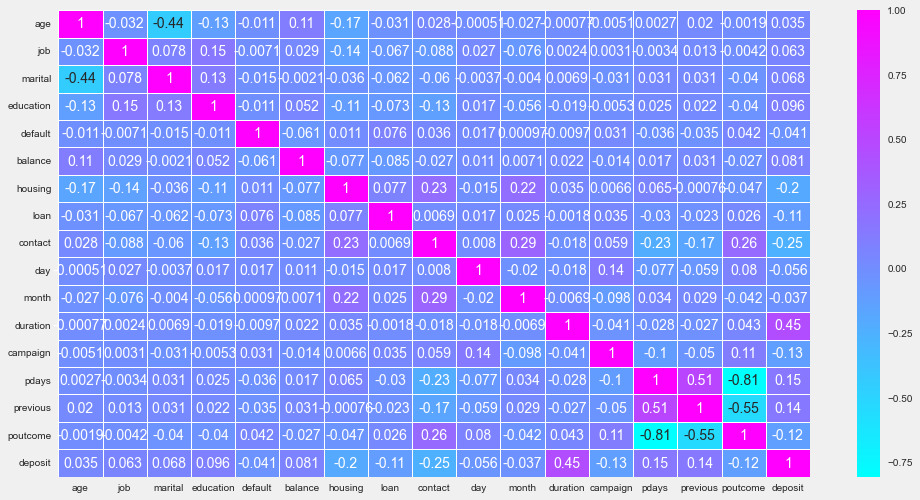

In [57]:
plt.figure(figsize=(15,8))
sns.heatmap(bank_df.corr(),annot=True, cmap='cool',lw=1)
plt.show()

From the above correlation heatmap, duration has the highest positive correlation with the target, deposit.

In [59]:
# set feature and target of the dataset
X = bank_df.iloc[:,:-1]
Y = bank_df.iloc[:,-1]

In [62]:
X.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3


In [63]:
Y.head(1)

0    1
Name: deposit, dtype: int8

# Machine Learning Algorithms implementations

## Standardize the dataset

In [58]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### import libraries

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [68]:
#train test split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [72]:
# all the algorithms in one dicionary

model_params = {'SVC':{'model':SVC(gamma='auto'),'params':{'C':[1,3,5,10,20],'kernel':['rbf','linear']}},
                'RandomForest':{'model':RandomForestClassifier(),'params':{'n_estimators':[1,2,3,4,5,10,15,20,25,30]}},
                
                'LogReg':{'model':LogisticRegression(),
                         'params':{
                             'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
                             'C':[1,5,10]
                         }},
                
                'DecisionTree':{'model':DecisionTreeClassifier(),
                               'params':{
                                   'criterion':['gini','entropy'],
                                   'max_depth':np.arange(20,dtype=int)
                               }}}


In [73]:
scores = []

for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=3, return_train_score=False)
    clf.fit(x_train,y_train)
    
    scores.append({'model':model_name,
                  'best_score':clf.best_score_,
                  'best_params':clf.best_params_
                  })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])


KeyboardInterrupt



## Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

logR = LogisticRegression()
logR.fit(x_train,y_train)
logR_pred = logR.predict(x_test)
logR_score = logR.score(x_test,y_test)

print(classification_report(y_test,logR_pred))
print('**************************************')
print('Model score= ',logR_score*100)
print('*******************************************')
pd.crosstab(y_test,logR_pred)


              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1729
           1       0.81      0.75      0.77      1620

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349

**************************************
Model score=  78.97879964168408
*******************************************


col_0,0,1
deposit,,
0,1438,291
1,413,1207


## RandomForest

In [81]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(x_train,y_train)
clf_pred = clf.predict(x_test)
clf_score = clf.score(x_test,clf_pred)

print(classification_report(y_test,clf_pred))
print('**************************************')
print('Model score= ',clf_score*100)
print('*******************************************')
pd.crosstab(y_test,clf_pred)


              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1729
           1       0.82      0.87      0.85      1620

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

**************************************
Model score=  100.0
*******************************************


col_0,0,1
deposit,,
0,1428,301
1,206,1414


## Support Vector Machine

In [82]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
svc_score= svc.score(x_test,y_test)

print(classification_report(y_test,svc_pred))
print('**************************************')
print('Model score= ',svc_score*100)
print('*******************************************')
pd.crosstab(y_test,svc_pred)


              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1729
           1       0.80      0.82      0.81      1620

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

**************************************
Model score=  81.75574798447298
*******************************************


col_0,0,1
deposit,,
0,1402,327
1,284,1336


### Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

dtree_pred = dtree.predict(x_test)
dtree_score = dtree.score(x_test,y_test)

print(classification_report(y_test,dtree_pred))
print('**************************************')
print('Model score= ',dtree_score*100)
print('*******************************************')
pd.crosstab(y_test,dtree_pred)


              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1729
           1       0.78      0.76      0.77      1620

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

**************************************
Model score=  77.93371155568826
*******************************************


col_0,0,1
deposit,,
0,1386,343
1,396,1224
